Brief description of the features

In [1]:
from data_utils import *
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import IPython.display as ipd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
#import librosa

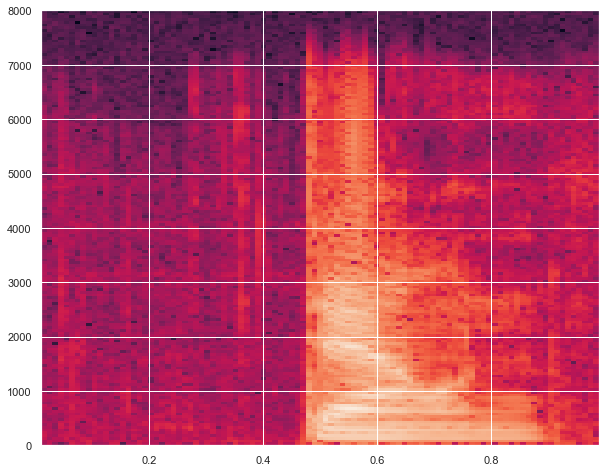

In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

filename = os.path.join(stop_dir,os.listdir(stop_dir)[0])
sample_rate, samples = wavfile.read(filename)
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])